In [3]:
import numpy as np
import matplotlib.pyplot as plt
from Maze import Maze
from Agent import Agent
from MyQLearning import MyQLearning
from MyEGreedy import MyEGreedy

In [4]:
def learning_algorithm(maze, end_state, number_of_episodes = 50, max_steps = 30000, epsilon = 0.1, alfa = 0.7, gamma = 0.9):
    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(0, 0)

    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()

    # Make a Qlearning object (you need to implement the methods in this class)
    learn = MyQLearning()


    # Set algorithm parameters
    # number_of_episodes = 50
    # max_steps = 30000
    # epsilon = 0.1
    # alfa = 0.7
    # gamma = 0.9
    action_list_all = []
    def cycle():
        """
        A method that simulates one cycle/episode of the robot
        It stops when it makes at most 30000 steps or when it reaches the goal
        :return:
        """
        end_cycle = False
        step = 0
        action_list = []
        while not end_cycle:
            # Select an action
            action = selection.get_egreedy_action(robot, maze, learn, epsilon)
            action_list.append(action)
            # get current state
            current_state = robot.get_state(maze)
            # do the step and get the next state
            state_next = robot.do_action(action, maze)
            # # get new state
            # state_next = robot.get_state(maze)
            # get reward from the action
            reward = maze.get_reward(state_next)
            # get possible actions
            possible_actions = maze.get_valid_actions(robot)
            # update the Q-table (Q(s, a))
            learn.update_q(current_state, action, reward, state_next, possible_actions, alfa, gamma)

            # increase the step counter
            step += 1
            if step == max_steps or robot.get_state(maze) == end_state:
                end_cycle = True
                num_of_steps.append(robot.nr_of_actions_since_reset)
                robot.reset()
        action_list_all.append(action_list)

    # keep learning until you decide to stop
    stop = False
    episode = 1
    num_of_steps = []
    while not stop:

        # run a cycle
        # TODO implement the action selection and learning cycle
        cycle()

        # TODO figure out a stopping criterion
        # stop when we reach number_of_episodes
        episode += 1
        if episode > number_of_episodes:
            stop = True
    # Return list with the number of steps each cycle took
    # And list of actions in each cycle (disclaimer: printing might cause fatal error for your machine)
    return num_of_steps, action_list_all

In [5]:
# Run everything num times
num = 1

# Load the maze
file = "../data/toy_maze.txt"
maze_toy = Maze(file)

# Set the reward at the bottom right to 10
maze_toy.set_reward(maze_toy.get_state(9, 9), 10)
toy_data = []
toy_action_list = []
for i in range(num):
    num_list, action_list = learning_algorithm(maze_toy, end_state=maze_toy.get_state(9, 9))
    toy_data.append(num_list)
    toy_action_list.append(action_list)

# Load the maze
file = "../data/easy_maze.txt"
maze_easy = Maze(file)

# I've also tried setting weight to -1 for all the other fields but it still sometime goes to max_steps

# Set the reward at the bottom right to 10
maze_easy.set_reward(maze_easy.get_state(24, 14), 10)
easy_data = []
easy_action_list = []
for i in range(num):
    num_list, action_list = learning_algorithm(maze_easy, max_steps=100000, number_of_episodes=50, end_state=maze_easy.get_state(24, 14))
    easy_data.append(num_list)
    easy_action_list.append(action_list)


Ready reading maze file ../data/toy_maze.txt
Made EGreedy
758
2038
800
238
130
1698
1640
264
92
134
496
152
262
184
202
36
170
40
42
114
38
106
256
30
52
54
44
68
26
24
24
30
26
26
24
24
32
28
26
30
26
28
24
28
28
28
26
32
30
26
Ready reading maze file ../data/easy_maze.txt
Made EGreedy
1730
18318
5560
9498
3580
6690
1064
11556
1080
4452
3078
446
1958
1486
5166
1156
1652
376
406
1954
360
148
264
268
356
154
3666
2914
464
554
52
310
202
66
1296
198
152
204
2380
2748
50
104
50
42
134
40
38
42
42
42


In [6]:
print(toy_data)
print(easy_data)

[[758, 2038, 800, 238, 130, 1698, 1640, 264, 92, 134, 496, 152, 262, 184, 202, 36, 170, 40, 42, 114, 38, 106, 256, 30, 52, 54, 44, 68, 26, 24, 24, 30, 26, 26, 24, 24, 32, 28, 26, 30, 26, 28, 24, 28, 28, 28, 26, 32, 30, 26]]
[[1730, 18318, 5560, 9498, 3580, 6690, 1064, 11556, 1080, 4452, 3078, 446, 1958, 1486, 5166, 1156, 1652, 376, 406, 1954, 360, 148, 264, 268, 356, 154, 3666, 2914, 464, 554, 52, 310, 202, 66, 1296, 198, 152, 204, 2380, 2748, 50, 104, 50, 42, 134, 40, 38, 42, 42, 42]]


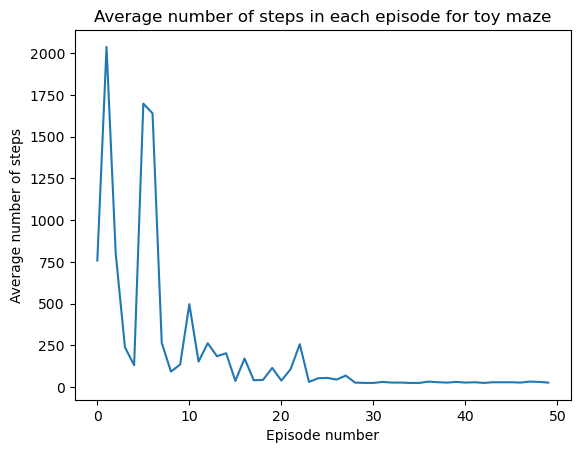

In [7]:
plt.plot(np.average(toy_data, axis=0))
plt.title("Average number of steps in each episode for toy maze")
plt.xlabel("Episode number")
plt.ylabel("Average number of steps")
plt.show()

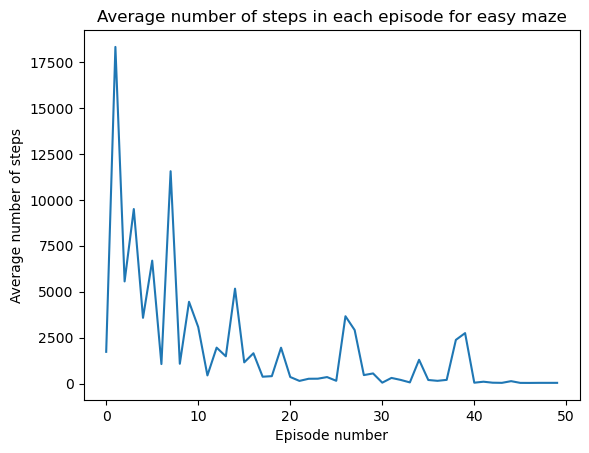

In [8]:
plt.plot(np.average(easy_data, axis=0))
plt.title("Average number of steps in each episode for easy maze")
plt.xlabel("Episode number")
plt.ylabel("Average number of steps")
plt.show()
# This bad boy keeps looping sometimes, getting the max steps